# Beat the Odds

### We created a program to roll two dice 10,000 times in sets of 24 to see how many double sixes turn up.  Then we evaluated it against the probability calculations that says in 24 rolls of the dice, you should see a double six at least once 49% of the time.

### Creating the list to record the rolls was straightforward; there were differnces when generating two output files via two different functions.  These returned different values (looking back, that is expected or else the random generator called is not random enough).  After working with a team mate, we collapsed those functions into one.  We used the file as inputs instead of passing parameters between functions.

### Finally, the program reports the results and visualizes the data in histograms and the distributions of the values was very, very even.  This model aligns very well with the probability calcuclations that double sixes will occur (35/36)^24, or about 49% of the time.

AUTHOR: Chirag Patel
* COURSE: ANLY 615
* PROGRAM: Probability of Doubles
* PURPOSE: Track and report on the results of 240,000 rolls of two dice.  What are the odds?
* INPUT: Random number generator
* PROCESS: Use random number generator to simulate two dice; record the results; analyze and display the reulsts.  Using pandas for some calculations and data manipulation.
* OUTPUT: Three files to record the results of the rolls and save the analysis.
* HONOR CODE: On my honor, as an Aggie, I have neither given nor received unauthorized aid on this academic work

You just ran a set of 24 rolls, 10,000 times for a total of 240,000 rolls.
Here is the distribution of values for the first die...fairly equal odds as expected.
see image ('images\die1_rolls.png')
Here is the distribution of values for the second die...fairly equal odds as expected.
see image ('images\die2_rolls.png')
You rolled doubles 39,945 times, or 16.64% of the time.
You rolled double sixes 6,602 times, or 2.75% of the time.

In 24 rolls, you typically see double sixes about 49% of the time.
In your 10,000 sets of 24 dice rolls you rolled double sixes 49.46% of the time.

Your results are in the range of what is expected.




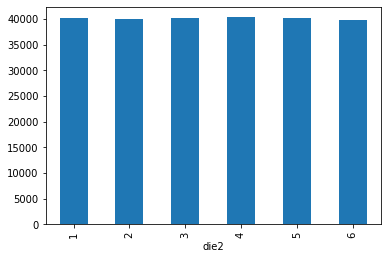

In [65]:
def rolldice(): #This function gets output for  4-c
    import random
    dieOne = 0
    dieTwo = 0
    doubleSix = 0
    totalDoubleSix = 0
    six = 6
    line=""
    one = 1
    zero = 0
    listc = []
    lofl = []
    gline=""

    with open("roll.csv", "w") as wfile:
        with open("gambler.csv", "w") as gfile:        
            for i in range(1,10001):
                line=""
                listc = []
                gline=""
                doubleSix = 0
                gline = str(i) + "," 
                for dice in range(1,25):
                    line=""
                    dieOne = random.randint(1, 6)
                    dieTwo = random.randint(1, 6)
                    line = str(i) + "," + str(dice) + "," + str(dieOne) + "," + str(dieTwo) + "," 
                    if dieOne == dieTwo: # finds both die has same number
                        line = line + str(one) + ","
                    else:
                        line = line + str(zero) + ","

                    if dieOne == six and dieTwo == six: # finds both die has number six
                        line = line + str(one) 
                        doubleSix += 1
                        totalDoubleSix += 1
                    else:
                        line = line + str(zero)
                    listc.append(line)
                    wfile.write(f"{line}\n")
                if doubleSix >= 1:
                    gline = str(i) + "," + "True" + "," + "Gambler" + "," + str(doubleSix)
                else:
                    gline = str(i) + "," + "False" + "," + "House" + "," + str(zero)
                gfile.write(f"{gline}\n")
            lofl.append(listc)            
        gfile.close()
    wfile.close()

def analytics():
    import pandas as pd
    # loading data for analysis
    # creating tables to evaluate the distribution of rolls
    gamblerDF = pd.read_csv('gambler.csv', names=['group','double_six','winner','double_sixes'])
    rollDF = pd.read_csv('roll.csv', names=(
        'round_num', 'roll_num', 'die1', 'die2', 'doubles', 'double_six'))
    # saving images of the die value histograms for the user to examine
    a = rollDF.groupby('die1')['die1'].agg('count').plot.bar()
    a.figure.savefig('images\die1_rolls.png')
    b = rollDF.groupby('die2')['die2'].agg('count').plot.bar()
    b.figure.savefig('images\die1_rolls.png')
    # getting totals for stats calcs
    double6 = rollDF['double_six'].sum()
    doubles = rollDF['doubles'].sum()
    setDoubles = gamblerDF[gamblerDF.winner == 'Gambler'].count()['winner']
    print(
        f"You just ran a set of 24 rolls, 10,000 times for a total of 240,000 rolls.\n"
        f"Here is the distribution of values for the first die...fairly equal odds as expected.\n"
        f"see image ('images\die1_rolls.png')\n"
        f"Here is the distribution of values for the second die...fairly equal odds as expected.\n"
        f"see image ('images\die2_rolls.png')\n"
        f"You rolled doubles {doubles:,} times, or {doubles/240000:.2%} of the time.\n"
        f"You rolled double sixes {double6:,} times, or {double6/240000:.2%} of the time.\n\n"
        f"In 24 rolls, you typically see double sixes about 49% of the time.\n"
        f"In your 10,000 sets of 24 dice rolls you rolled double sixes {setDoubles/10000:.2%} of the time.\n"    
        )
    if (setDoubles/10000) > .5:
        print("Book your flight to Vegas, baby!\n\n")
    elif (double6/10000) > .4:
        print("Your results are in the range of what is expected.\n\n")
    else:
        print("Better luck next time.\n\n")
    # take the outputs and saving the same output to a txt file, less the graphs since the txt file cannot handle it.
    with open('stats.txt', 'w') as f:
        f.write(
            f"You just ran a set of 24 rolls, 10,000 times for a total of 240,000 rolls.\n"
            f"The distribution of values for the first die...fairly equal odds as expected.\n"
            f"see image ('images\die1_rolls.png')\n"
            f"The distribution of values for the second die...fairly equal odds as expected.\n"
            f"see image ('images\die2_rolls.png')\n"
            f"You rolled doubles {doubles:,} times, or {doubles/240000:.2%} of the time.\n"
            f"You rolled double sixes {double6:,} times, or {double6/240000:.2%} of the time.\n\n"
            f"In 24 rolls, you typically see double sixes about 49% of the time.\n"
            f"In your 10,000 sets of 24 dice rolls you rolled double sixes {setDoubles/10000:.2%} of the time.\n"
        )
        if (setDoubles/10000) > .5:
            f.write("Book your flight to Vegas, baby!\n\n")
        elif (double6/10000) > .4:
            f.write("Your results are in the range of what is expected.\n\n")
        else:
            f.write("Better luck next time.\n\n")

    return

def main():
    rolldice()
    analytics()

if __name__ == "__main__":
    main()

        round_num  roll_num  die1  die2  doubles  double_six
0               1         1     5     2        0           0
1               1         2     5     6        0           0
2               1         3     5     1        0           0
3               1         4     1     3        0           0
4               1         5     2     2        1           0
...           ...       ...   ...   ...      ...         ...
239995      10000        20     6     1        0           0
239996      10000        21     4     1        0           0
239997      10000        22     4     5        0           0
239998      10000        23     3     5        0           0
239999      10000        24     3     1        0           0

[240000 rows x 6 columns]
Index:  RangeIndex(start=0, stop=240000, step=1)
Columns:  Index(['round_num', 'roll_num', 'die1', 'die2', 'doubles', 'double_six'], dtype='object')
Size:  1440000
Shape:  (240000, 6)
Values:  [[    1     1     5     2     0     0]
 [    1  

<AxesSubplot:xlabel='die2'>

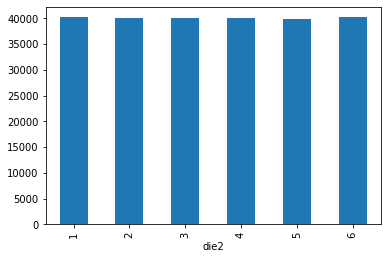

In [15]:
import random
dieOne = 0
dieTwo = 0
doubleSix = 0
totalDoubleSix = 0
six = 6
line=""
one = 1
zero = 0
listc = []
lofl = []
gline=""

with open("roll.csv", "w") as wfile:
    with open("gambler.csv", "w") as gfile:        
        for i in range(1,10001):
            line=""
            listc = []
            gline=""
            doubleSix = 0
            gline = str(i) + "," 
            for dice in range(1,25):
                line=""
                dieOne = random.randint(1, 6)
                dieTwo = random.randint(1, 6)
                line = str(i) + "," + str(dice) + "," + str(dieOne) + "," + str(dieTwo) + "," 
                if dieOne == dieTwo: # finds both die has same number
                    line = line + str(one) + ","
                else:
                    line = line + str(zero) + ","

                if dieOne == six and dieTwo == six: # finds both die has number six
                    line = line + str(one) 
                    doubleSix += 1
                    totalDoubleSix += 1
                else:
                    line = line + str(zero)
                listc.append(line)
                wfile.write(f"{line}\n")
            if doubleSix >= 1:
                gline = str(i) + "," + "True" + "," + "Gambler" + "," + str(doubleSix)
            else:
                gline = str(i) + "," + "False" + "," + "House" + "," + str(zero)
            gfile.write(f"{gline}\n")
        lofl.append(listc)            
    gfile.close()
wfile.close()

import pandas as pd
gamblerDF = pd.read_csv('gambler.csv')
rollDF = pd.read_csv('roll.csv', names=(
    'round_num', 'roll_num', 'die1', 'die2', 'doubles', 'double_six'))
print(rollDF)
print("Index: ", rollDF.index)
print("Columns: ", rollDF.columns)
print("Size: ", rollDF.size)
print("Shape: ", rollDF.shape)
print("Values: ", rollDF.values)
print("Info: ", rollDF.info())
rollDF.info()
double6 = rollDF['double_six'].sum()
doubles = rollDF['doubles'].sum()
print(
    f"You just ran a set of 24 rolls, 10,000 times for a total of 240,000 rolls.\n"
    f"You rolled doubles {doubles:,} times, or {doubles/240000:.2%} of the time.\n"
    f"You rolled double sixes {double6:,} times, or {double6/240000:.2%} of the time.\n\n"
    f"In 24 rolls, you typically see double sixes about 49% of the time.\n"
    f"In your 10,000 sets of 24 dice rolls you rolled double sixes {double6/10000:.2%} of the time.\n"    
    )
if (double6/10000) > .49:
    print("Book your flight to Vegas, baby!\n\n")
elif (double6/10000) > .4:
    print("Your results are in the range of what is expected.\n\n")
else:
    print("Better luck next time.\n\n")

rollDF.groupby('die1')['die1'].agg('count').plot.bar()
rollDF.groupby('die2')['die2'].agg('count').plot.bar()

# Plots
### Here are histograms for dice all of the dice rolls.  They should be fairly equal; they all appear to be so, indicating the randon number generator is random for this code.

<AxesSubplot:xlabel='die1', ylabel='Count'>

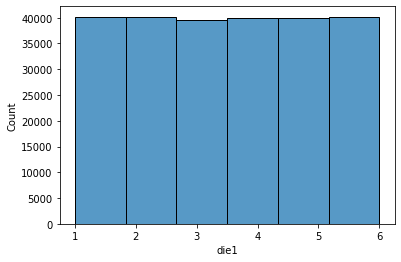

In [59]:
sns.histplot(rollDF['die1'], bins = 6, legend=False)


<AxesSubplot:xlabel='die2', ylabel='Count'>

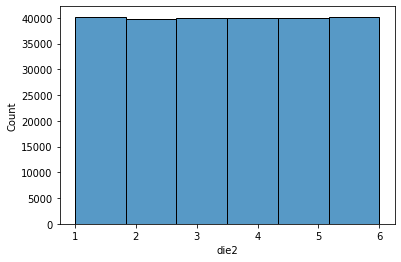

In [60]:
sns.histplot(rollDF['die2'], bins = 6, legend=False)


<AxesSubplot:xlabel='die1'>

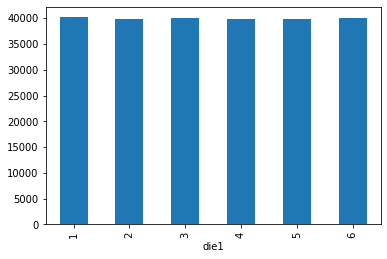

In [14]:
rollDF.groupby('die1')['die1'].agg('count').plot.bar()

<AxesSubplot:xlabel='die2'>

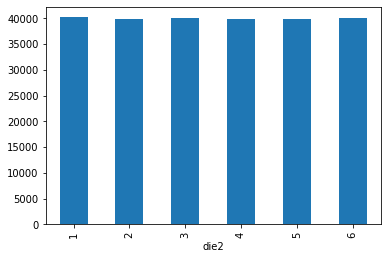

In [58]:
g = rollDF.groupby('die2')['die2'].agg('count').plot.bar()
g.figure.savefig('demo.png')